**Modern Portfolio Theory (MPT)**

This notebook is a quick illustration of how Empyrial can be used for obtaining the optimal allocations.

In the example below, we pick some stocks and benchmark it against the S&P500. We are using SPY as it's the next-alternative 

(as opposed to trying to come up with our own allocations).



In [1]:
# !pip install empyrial

In [2]:
from empyrial import empyrial, Engine
import pandas as pd

**Parameter values:** <1>
* start_date = 2020-01-01; it's discretionary (Note 1)
* portfolio = List of string of symbols. Here, it's just a selection of large caps. 
* optimizer = "MINVAR" - Applying MPT with objective to minimize portfolio variance
* rebalance = once per quarter

Note 1: For "start_date" - Although academic studies suggest 12-months is the ideal lookback period for backtesting, the choice of it may rather be arbitrary. It can be argued that trying to find a best fitted start-end date for strategies over historical data may be counter productive. <2> 

In [3]:
portfolio = Engine(
    start_date = "2021-05-1",                                      
    portfolio = ["AAPL","JNJ","KO","MRK","PFE","PM","TSM", "MSFT", "MCD", "TSLA"],
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "quarterly"
)

# Summary:

Start date: 2021-05-1
End date: 2023-06-02


,Backtest
,
Annual return,10.79%
Cumulative return,23.34%
Annual volatility,15.82 %
Winning day ratio,53.1%
Sharpe ratio,0.73
Calmar ratio,0.59
Information ratio,0.0
Stability,0.35
Max Drawdown,-17.95 %


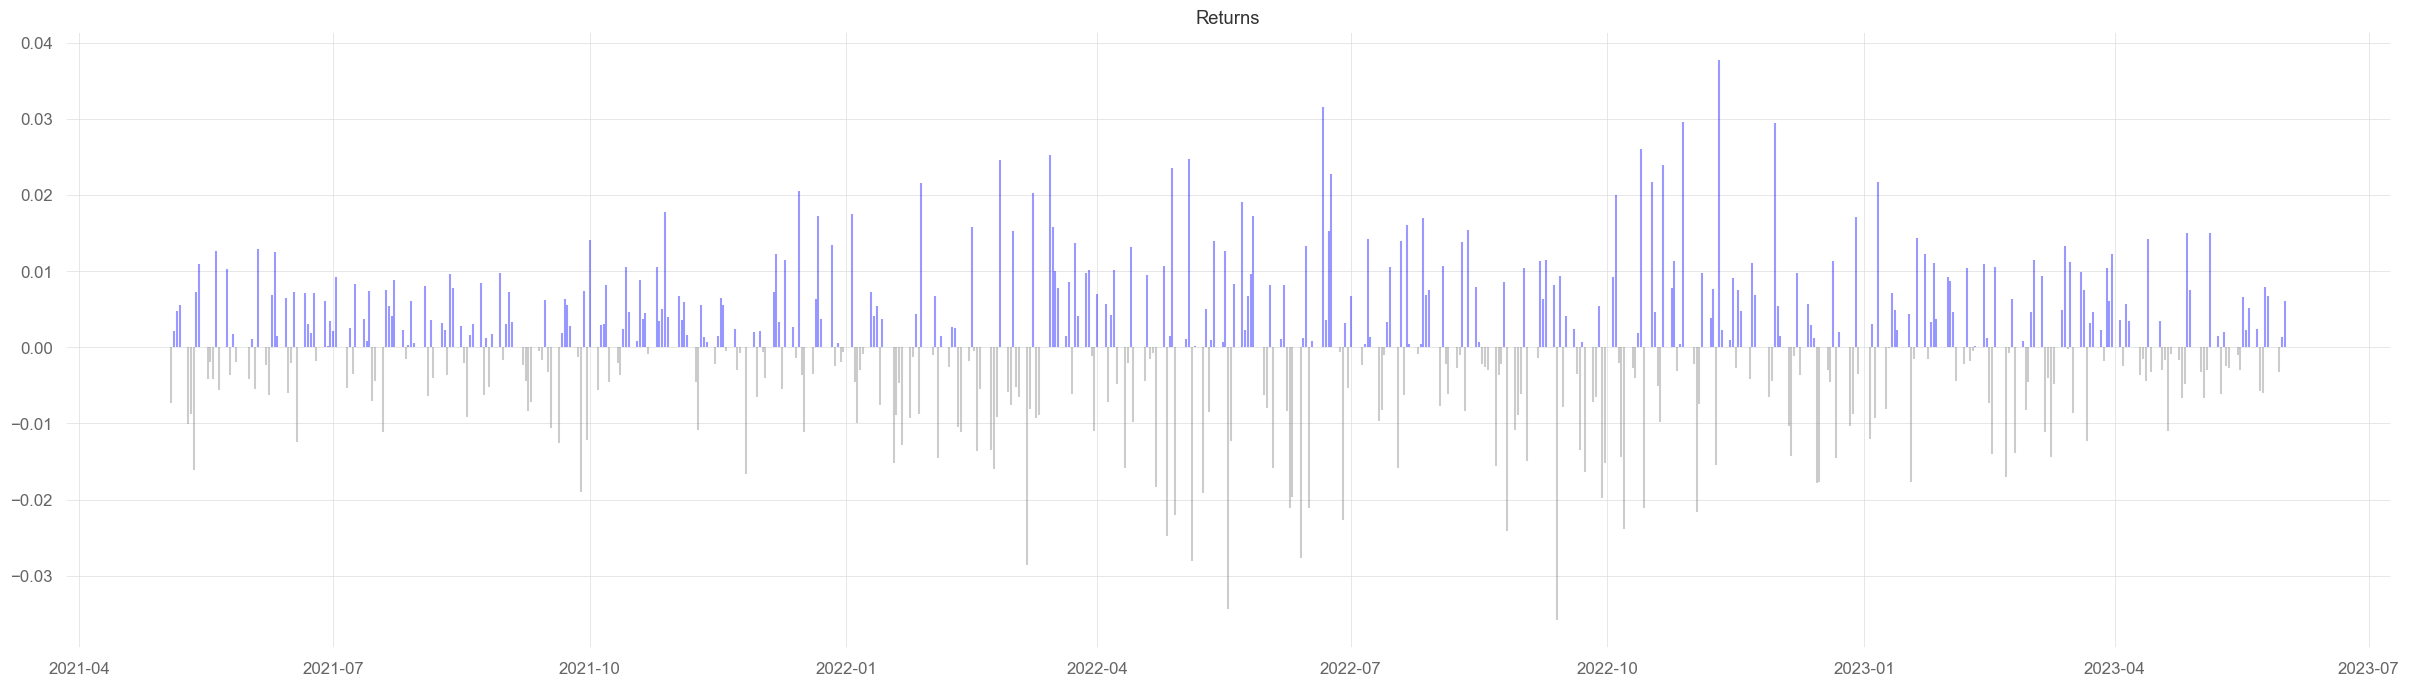

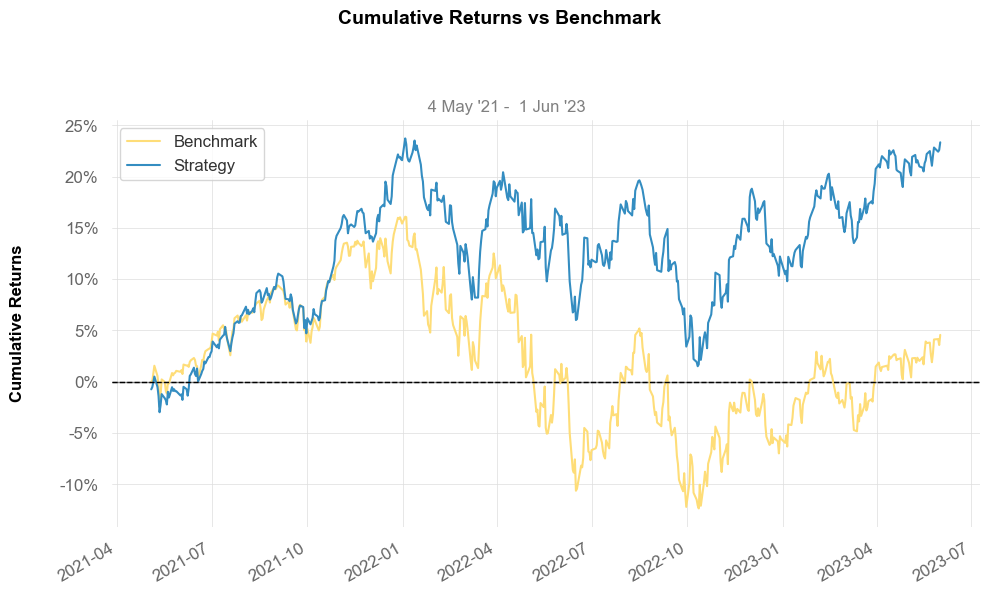

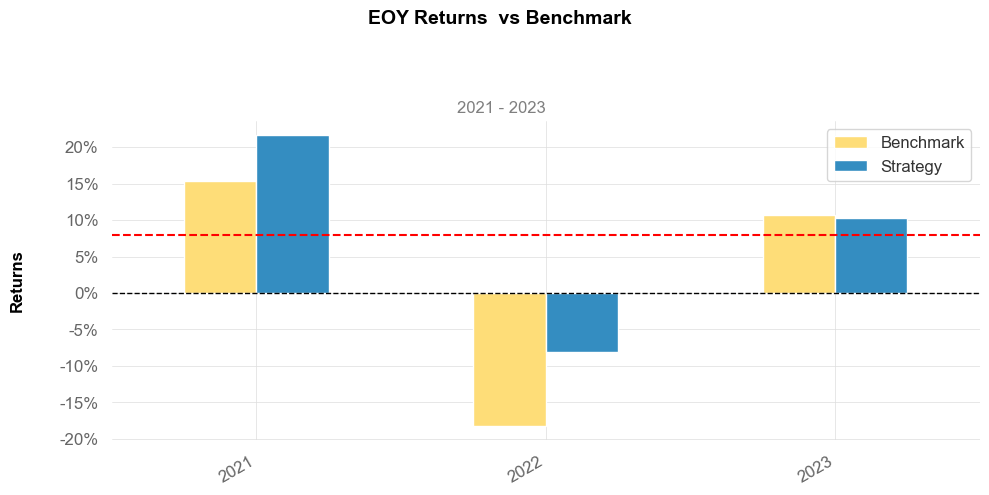

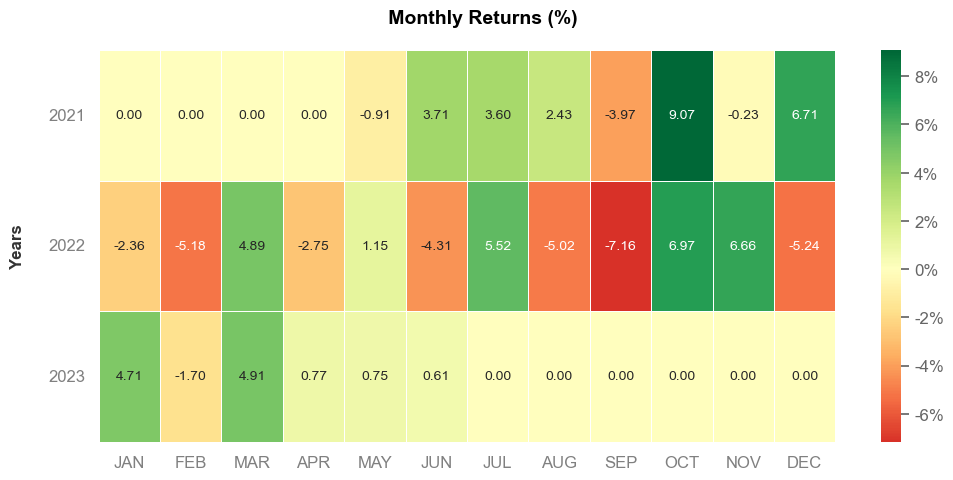

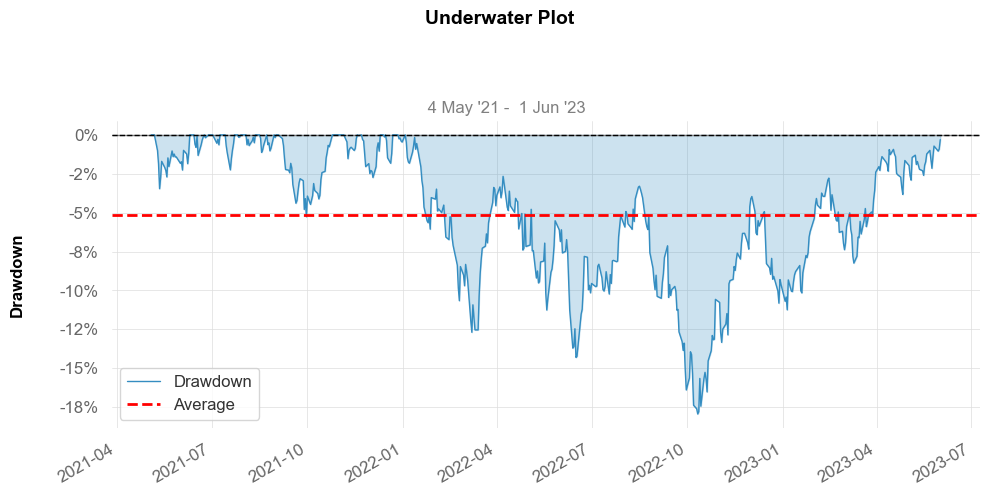

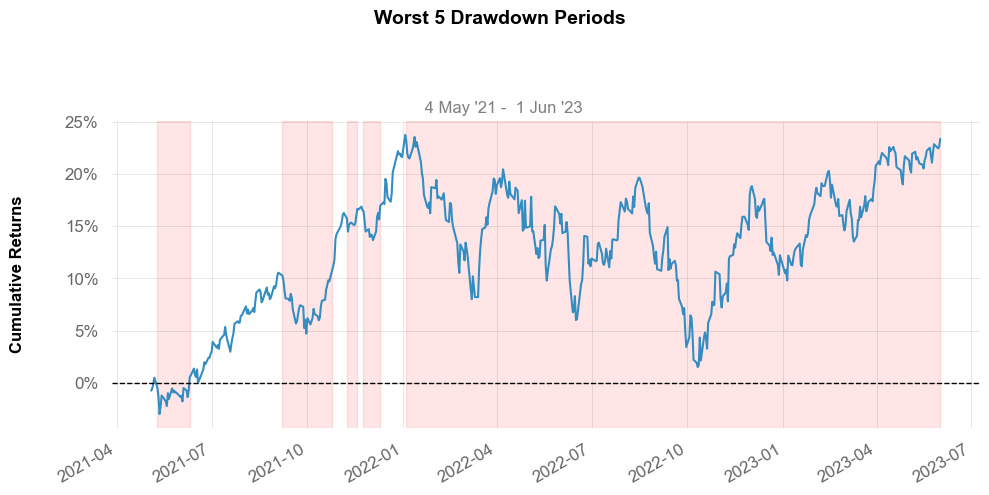

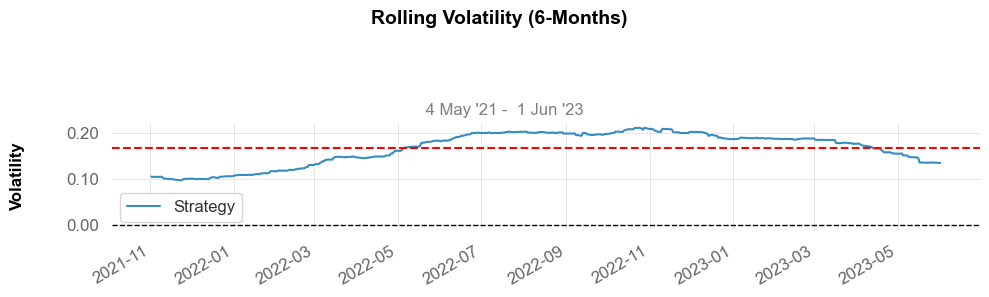

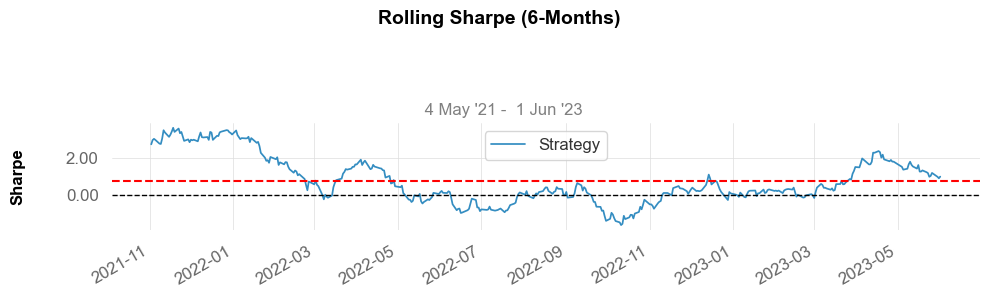

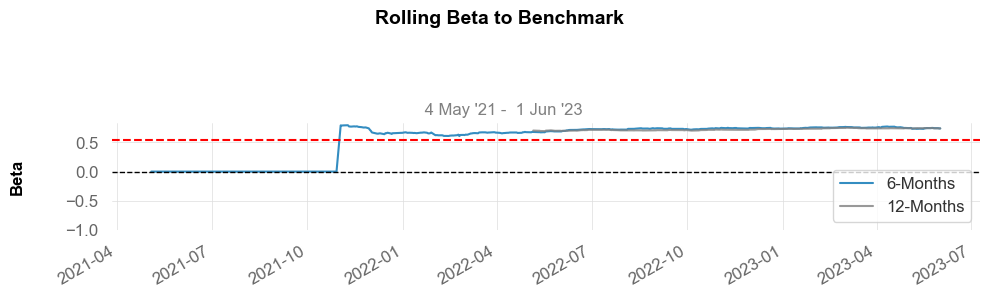

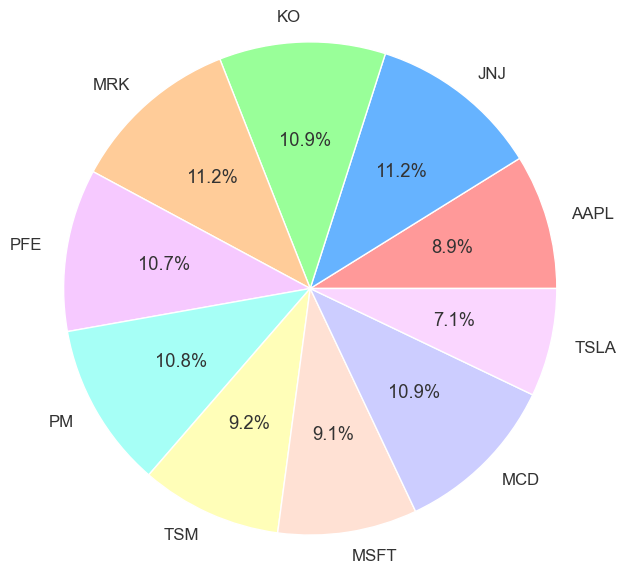

In [4]:
empyrial(portfolio);

# Summary of allocations

In [5]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2021-07-31,2021-10-30,2022-01-29,2022-05-01,2022-07-31,2022-10-30,2023-01-29,2023-05-01,2023-06-02
AAPL,0.09545,0.09591,0.09458,0.09303,0.08976,0.08831,0.08715,0.08823,0.08850
JNJ,0.10394,0.10405,0.10637,0.10904,0.11162,0.11266,0.11361,0.11237,0.11218
KO,0.10340,0.10330,0.10461,0.10732,0.10847,0.10878,0.10897,0.10915,0.10905
MRK,0.10622,0.10169,0.10469,0.10696,0.10991,0.11109,0.11273,0.11185,0.11171
PFE,0.10480,0.10201,0.10479,0.10628,0.10696,0.10624,0.10671,0.10660,0.10654
PM,0.10292,0.10186,0.10463,0.10592,0.10917,0.10873,0.10900,0.10859,0.10843
TSM,0.09421,0.09727,0.09528,0.09249,0.09260,0.09334,0.09190,0.09272,0.09249
MSFT,0.09702,0.09762,0.09725,0.09473,0.09299,0.09168,0.09070,0.09119,0.09140
MCD,0.10131,0.10303,0.10434,0.10495,0.10691,0.10725,0.10898,0.10888,0.10874
TSLA,0.09074,0.09327,0.08345,0.07928,0.07161,0.07192,0.07026,0.07041,0.07096


In [6]:
print("But only want the allocation as of today: ") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

But only want the allocation as of today: 


,2023-06-02
AAPL,0.08850
JNJ,0.11218
KO,0.10905
MRK,0.11171
PFE,0.10654
PM,0.10843
TSM,0.09249
MSFT,0.09140
MCD,0.10874
TSLA,0.07096


---
References:

<1> Quick guide on how to set the parameter [https://empyrial.gitbook.io/empyrial/quickstart](https://empyrial.gitbook.io/empyrial/quickstart)

<2> Toma Hentea; Feb. 2019; "Optimal Lookback Period For Momentum Strategies" [Article from seekingalpha](https://seekingalpha.com/article/4240540-optimal-lookback-period-for-momentum-strategies )